In [ ]:
from transformers import AutoTokenizer
import pandas as pd

# Choose a tokenizer (use the one your models use)
tokenizer = AutoTokenizer.from_pretrained("mrm8488/legal-longformer-base-8192-spanish")

# Load queries
queries_df = pd.read_csv("queries_57.csv", usecols=["topic_id", "Query"])
queries = queries_df["Query"].tolist()

# Load documents
docs_df = pd.read_csv("corpus_py.csv", usecols=["Codigo", "text"])
docs = docs_df["text"].tolist()

# Tokenize queries and count token lengths
query_token_lengths = [len(tokenizer.tokenize(q)) for q in queries]

# Tokenize documents and count token lengths
doc_token_lengths = [len(tokenizer.tokenize(d)) for d in docs]

avg_doc_length = sum(doc_token_lengths) / len(doc_token_lengths)
print("Average document token length:", avg_doc_length)

/home/leon/tesis/Environments/IR_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Token indices sequence length is longer than the specified maximum sequence length for this model (11302 > 8192). Running this sequence through the model will result in indexing errors


Average document token length: 3848.5914


In [17]:
import sys
import os
print(os.path.isdir(os.path.expanduser("~/tesis/messirve-ir")))
sys.path.append(os.path.expanduser("~/tesis/messirve-ir"))
# sys.path.append("~/tesis/messirve-ir/src")
from src.utils.retrieval_utils import get_legal_dataset

doc_ids, docs = get_legal_dataset(os.path.join("corpus_raw_google_ocr.csv"))
print(docs[2])


True
DE
CORTE
SUPREMA
DE JUSTICIA
1073/18 RC
EXPTE: "NESTOR
VALENTIN
GONZALEZ
S/HOMICIDIO DOLOSO -TENTATIVA".
RECIDIDO
02 JON 2021
Yanisa Colman
ACUERDO Y SENTENCIA NÚMERO:.
CUERDO
Duinientos luansta
En la ciudad de Asunción, Capital de la República del Paraguay, a los
Dus
_.días del mes de Junio.
de.....
..........del año dos mil
veintiuno, estando reunidos en la Sala de Acuerdos los Excmos. Señores
Ministros de la Corte Suprema de Justicia, Sala Penal, Doctores MANUEL
RAMIREZ CANDIA, LUIS MARIA BENITEZ RIERA,Y MARIA CAROLINA
LLANES OCAMPOS, por ante mí, la Secretaria autorizante, se trajo el
expediente caratulado "NESTOR VALENTIN GONZALEZ S/HOMICIDIO DOLOSO -
TENTATIVA", a fin de resolver el Recurso Extraordinario de Casación
interpuesto contra el Acuerdo y Sentencia N° 42 de fecha 22 de agosto de
2018, del Tribunal de Apelación en lo Penal, Tercera Sala, de la
Circunscripción Judicial de la Capital.
Previo el estudio de los antecedentes del caso, la Corte Suprema de
Justicia, Sala P

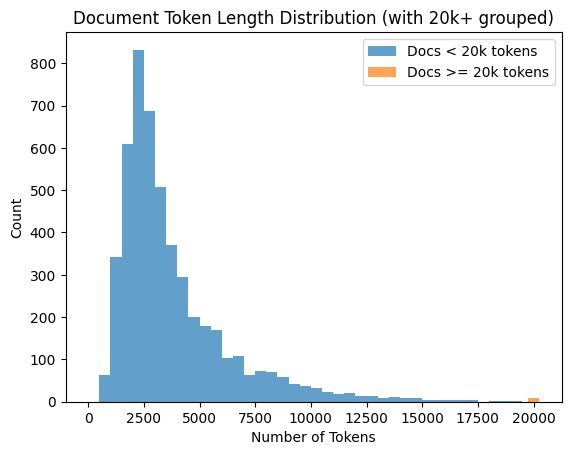

Query Token Length Stats:
Mean: 5.18
Median: 4.00
Max: 18
Min: 1

Document Token Length Stats:
Mean: 3848.59
Median: 2971.50
Max: 79716
Min: 559


In [6]:
# Count docs below and above threshold
below_threshold = [x for x in doc_token_lengths if x < threshold]
above_threshold_count = len(doc_token_lengths) - len(below_threshold)

# Create histogram for docs below threshold
bins = np.arange(0, threshold, 500)
counts, bin_edges = np.histogram(below_threshold, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.bar(bin_centers, counts, width=500, align='center', alpha=0.7, label="Docs < 20k tokens")
# Add one bar for docs >=20k tokens at position threshold
plt.bar(threshold, above_threshold_count, width=500, align='center', alpha=0.7, label="Docs >= 20k tokens")
plt.xlabel("Number of Tokens")
plt.ylabel("Count")
plt.title("Document Token Length Distribution (with 20k+ grouped)")
plt.legend()
plt.show()


# Compute statistics
print("Query Token Length Stats:")
print(f"Mean: {np.mean(query_token_lengths):.2f}")
print(f"Median: {np.median(query_token_lengths):.2f}")
print(f"Max: {np.max(query_token_lengths)}")
print(f"Min: {np.min(query_token_lengths)}")

print("\nDocument Token Length Stats:")
print(f"Mean: {np.mean(doc_token_lengths):.2f}")
print(f"Median: {np.median(doc_token_lengths):.2f}")
print(f"Max: {np.max(doc_token_lengths)}")
print(f"Min: {np.min(doc_token_lengths)}")

label
0    842
1    132
2    131
3    581
Name: count, dtype: int64


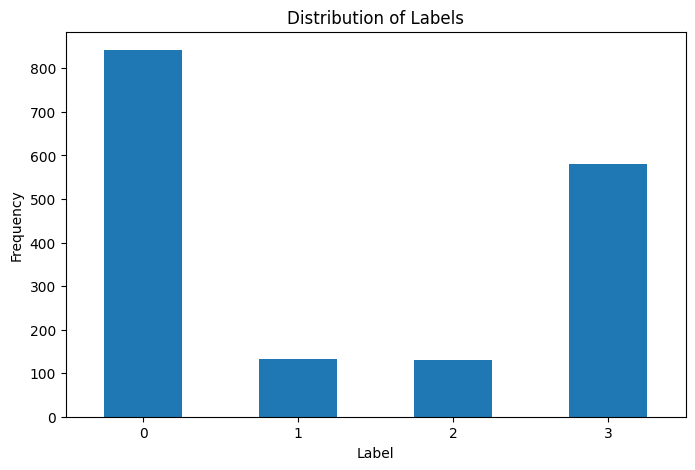

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the TSV file into a DataFrame
# Adjust the file path as needed.
df = pd.read_csv("qrels_py.tsv", sep="\t", header=None, names=["qid", "run", "doc_id", "label"])

# Count the frequency of each label
label_counts = df["label"].value_counts().sort_index()
print(label_counts)

# Plot the label distribution as a bar chart
plt.figure(figsize=(8, 5))
label_counts.plot(kind="bar")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.title("Distribution of Labels")
plt.xticks(rotation=0)
plt.show()


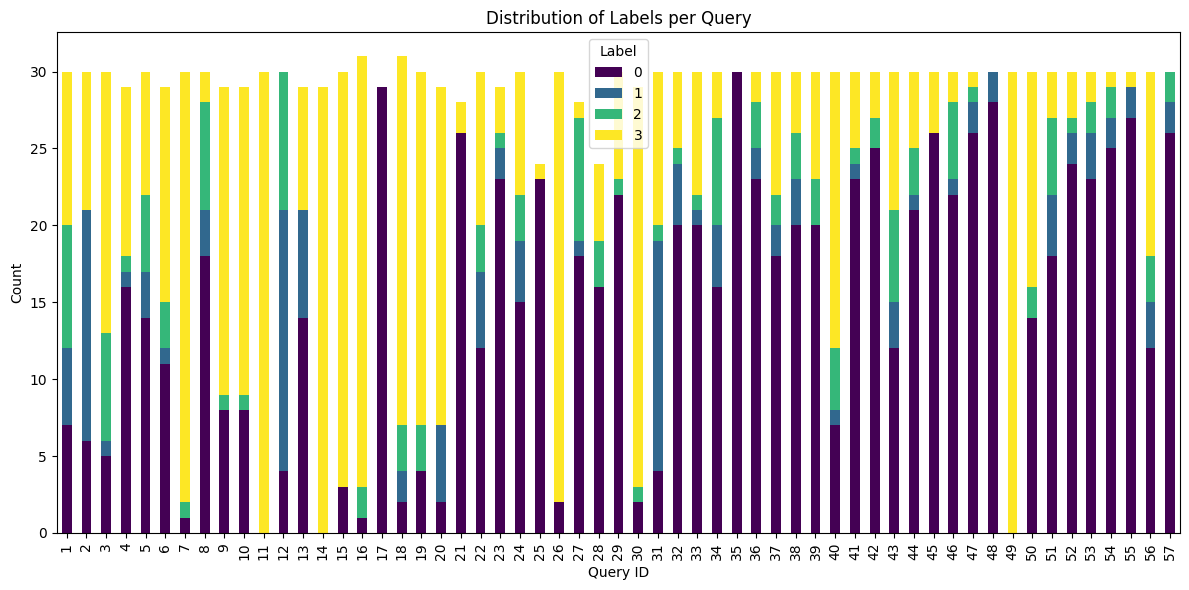

Query 17: missing 7 positive annotations
Query 21: missing 5 positive annotations
Query 23: missing 3 positive annotations
Query 25: missing 6 positive annotations
Query 32: missing 1 positive annotations
Query 35: missing 7 positive annotations
Query 36: missing 2 positive annotations
Query 41: missing 1 positive annotations
Query 42: missing 2 positive annotations
Query 45: missing 3 positive annotations
Query 47: missing 5 positive annotations
Query 48: missing 7 positive annotations
Query 52: missing 3 positive annotations
Query 53: missing 3 positive annotations
Query 54: missing 4 positive annotations
Query 55: missing 6 positive annotations
Query 57: missing 5 positive annotations


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the TSV file into a DataFrame
df = pd.read_csv("qrels_py.tsv", sep="\t", header=None, names=["qid", "run", "doc_id", "label"])

# Group by query and label, then count frequencies
grouped = df.groupby(["qid", "label"]).size().reset_index(name="count")

# Pivot the data so that each row is a query and columns are the labels
pivot_df = grouped.pivot(index="qid", columns="label", values="count").fillna(0)

# Plot a stacked bar chart for each query
pivot_df.plot(kind="bar", stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel("Query ID")
plt.ylabel("Count")
plt.title("Distribution of Labels per Query")
plt.legend(title="Label")
plt.tight_layout()
plt.show()

# after pivot_df = …
threshold = 7

# compute how many positives (label 2 or 3) each query has
pos_counts = pivot_df.get(2, 0) + pivot_df.get(3, 0)

# compute how many POS labels each query is missing
missing_counts = (threshold - pos_counts).clip(lower=0)

# keep only those that are actually missing something
missing_counts = missing_counts[missing_counts > 0]

# display
for qid, miss in missing_counts.items():
    print(f"Query {qid}: missing {miss:.0f} positive annotations")



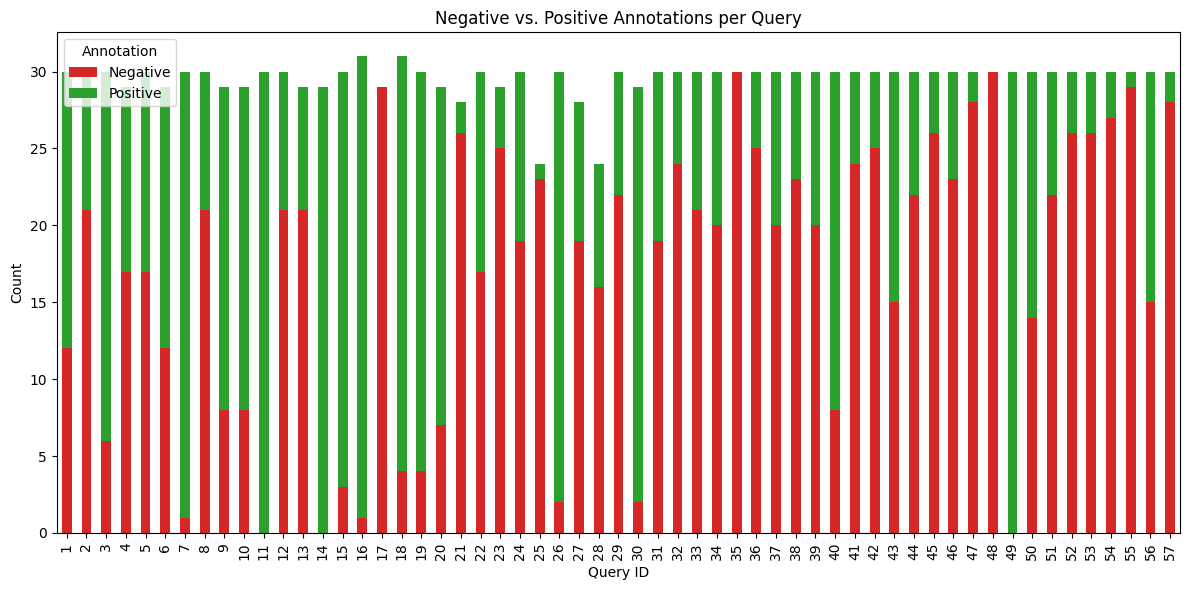

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the TSV file into a DataFrame
df = pd.read_csv("qrels_py.tsv", sep="\t", header=None,
                 names=["qid", "run", "doc_id", "label"])

# Pivot original counts so we have columns for labels 0,1,2,3
grouped = df.groupby(["qid", "label"]).size().unstack(fill_value=0)

# Compute “Negative” = labels 0+1 and “Positive” = labels 2+3
grouped["Negative"] = grouped.get(0, 0) + grouped.get(1, 0)
grouped["Positive"] = grouped.get(2, 0) + grouped.get(3, 0)

# Keep only the binary columns and plot
binary_df = grouped[["Negative", "Positive"]]

binary_df.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["#d62728", "#2ca02c"],  # optional: red for negative, green for positive
)

plt.xlabel("Query ID")
plt.ylabel("Count")
plt.title("Negative vs. Positive Annotations per Query")
plt.legend(title="Annotation")
plt.tight_layout()
plt.show()


Distribution of Labels of the medium- and easy-negatives enhanced binary dataset (For training BCE cross-encoder)

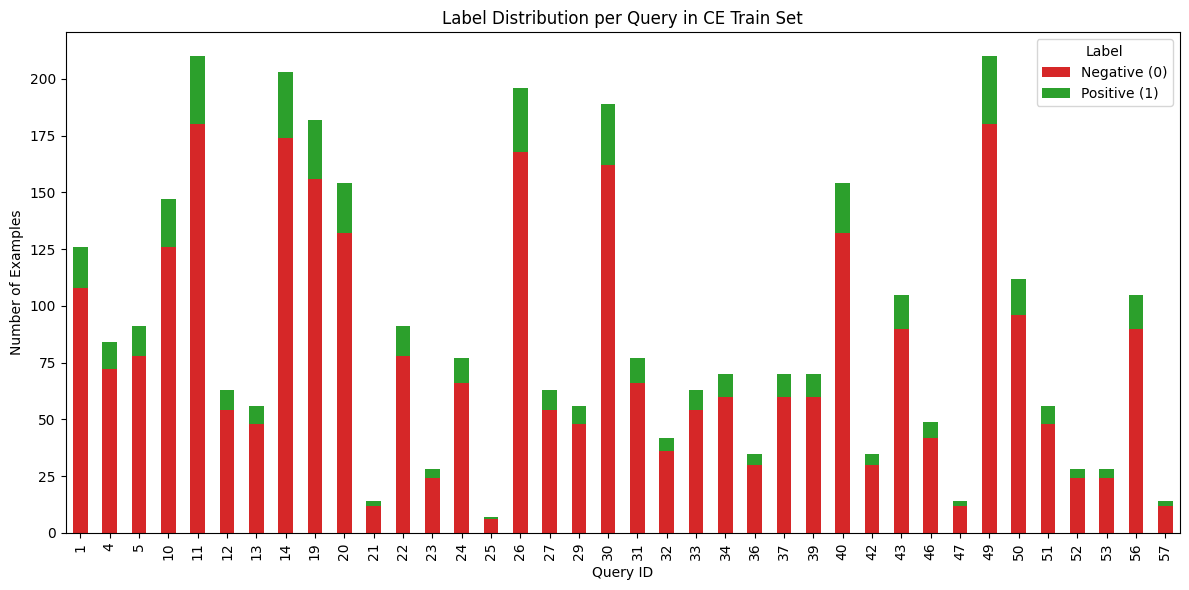

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.expanduser("~/tesis/messirve-ir"))
from config.config import STORAGE_DIR

# Path to the CE train dataset
train_path = os.path.join(
    STORAGE_DIR, "legal_ir", "data",
    "datasets", "cross_encoder", "bce_train.tsv"
)

# Load only the query IDs and labels
df = pd.read_csv(train_path, sep="\t", usecols=["qid", "label"])

# Count negatives (0) vs positives (1) per query
counts = (
    df.groupby(["qid", "label"])
      .size()
      .unstack(fill_value=0)
)
counts.columns = ["Negative (0)", "Positive (1)"]

# Plot the stacked bar chart
counts.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["#d62728", "#2ca02c"]
)
plt.xlabel("Query ID")
plt.ylabel("Number of Examples")
plt.title("Label Distribution per Query in CE Train Set")
plt.legend(title="Label")
plt.tight_layout()
plt.show()


In [10]:
import os
import pandas as pd
from config.config import STORAGE_DIR

# Path to the CE train dataset
train_path = os.path.join(
    STORAGE_DIR, "legal_ir", "data",
    "datasets", "cross-encoder", "bce_train.tsv"
)

# Load query IDs and labels
df = pd.read_csv(train_path, sep="\t", usecols=["qid", "label"])

# Count negatives (0) vs positives (1) per query
counts = df.groupby(["qid", "label"]).size().unstack(fill_value=0)
counts.columns = ["neg", "pos"]

# Total number of annotations
total_annotations = counts["neg"].sum() + counts["pos"].sum()
print(f"Total annotations: {total_annotations}")

# Compute positive/negative ratio per query
counts["pos_neg_ratio"] = counts["neg"] / counts["pos"].replace(0, pd.NA)

# Print per-query stats
for qid, row in counts.iterrows():
    print(f"Query {qid}: pos={row['pos']}, neg={row['neg']}, ratio={row['pos_neg_ratio']:.2f}")


Total annotations: 2730
Query 1: pos=18.0, neg=108.0, ratio=6.00
Query 4: pos=12.0, neg=72.0, ratio=6.00
Query 5: pos=13.0, neg=43.0, ratio=3.31
Query 10: pos=21.0, neg=126.0, ratio=6.00
Query 11: pos=30.0, neg=180.0, ratio=6.00
Query 12: pos=9.0, neg=54.0, ratio=6.00
Query 13: pos=8.0, neg=48.0, ratio=6.00
Query 14: pos=29.0, neg=174.0, ratio=6.00
Query 19: pos=26.0, neg=54.0, ratio=2.08
Query 20: pos=22.0, neg=51.0, ratio=2.32
Query 21: pos=2.0, neg=12.0, ratio=6.00
Query 22: pos=13.0, neg=43.0, ratio=3.31
Query 23: pos=4.0, neg=24.0, ratio=6.00
Query 24: pos=11.0, neg=41.0, ratio=3.73
Query 25: pos=1.0, neg=6.0, ratio=6.00
Query 26: pos=28.0, neg=168.0, ratio=6.00
Query 27: pos=9.0, neg=37.0, ratio=4.11
Query 29: pos=8.0, neg=48.0, ratio=6.00
Query 30: pos=27.0, neg=52.0, ratio=1.93
Query 31: pos=11.0, neg=66.0, ratio=6.00
Query 32: pos=6.0, neg=36.0, ratio=6.00
Query 33: pos=9.0, neg=39.0, ratio=4.33
Query 34: pos=10.0, neg=40.0, ratio=4.00
Query 36: pos=5.0, neg=30.0, ratio=6.00
Q